<a href="https://colab.research.google.com/github/Dichand/Projects/blob/main/3_house_price_prediction(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
#downloaded and extracted the dataset  from "https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download" to read the csv file
df = pd.read_csv("/content/kc_house_data.csv")

In [ ]:
#1st 5 rows of the dataframe 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# EDA

In [ ]:
# Rows and cplomns of the dataframe
df.shape

(21613, 21)

In [ ]:
#Checking datatypes and null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
#Statical descrivtion of the dataframe
pd.set_option('display.float_format', lambda x: '%.5f' % x) #to remove the scientific notations like 2.13e+05 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000,21613.00000
mean,4580301520.86499,540088.14177,3.37084,2.11476,2079.89974,15106.96757,1.49431,0.00754,0.23430,3.40943,7.65687,1788.39069,291.50905,1971.00514,84.40226,98077.93980,47.56005,-122.21390,1986.55249,12768.45565
std,2876565571.31206,367127.19648,0.93006,0.77016,918.44090,41420.51152,0.53999,0.08652,0.76632,0.65074,1.17546,828.09098,442.57504,29.37341,401.67924,53.50503,0.13856,0.14083,685.39130,27304.17963
min,1000102.00000,75000.00000,0.00000,0.00000,290.00000,520.00000,1.00000,0.00000,0.00000,1.00000,1.00000,290.00000,0.00000,1900.00000,0.00000,98001.00000,47.15590,-122.51900,399.00000,651.00000
25%,2123049194.00000,321950.00000,3.00000,1.75000,1427.00000,5040.00000,1.00000,0.00000,0.00000,3.00000,7.00000,1190.00000,0.00000,1951.00000,0.00000,98033.00000,47.47100,-122.32800,1490.00000,5100.00000
50%,3904930410.00000,450000.00000,3.00000,2.25000,1910.00000,7618.00000,1.50000,0.00000,0.00000,3.00000,7.00000,1560.00000,0.00000,1975.00000,0.00000,98065.00000,47.57180,-122.23000,1840.00000,7620.00000
75%,7308900445.00000,645000.00000,4.00000,2.50000,2550.00000,10688.00000,2.00000,0.00000,0.00000,4.00000,8.00000,2210.00000,560.00000,1997.00000,0.00000,98118.00000,47.67800,-122.12500,2360.00000,10083.00000
max,9900000190.00000,7700000.00000,33.00000,8.00000,13540.00000,1651359.00000,3.50000,1.00000,4.00000,5.00000,13.00000,9410.00000,4820.00000,2015.00000,2015.00000,98199.00000,47.77760,-121.31500,6210.00000,871200.00000


In [ ]:
#Checking missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No missing value

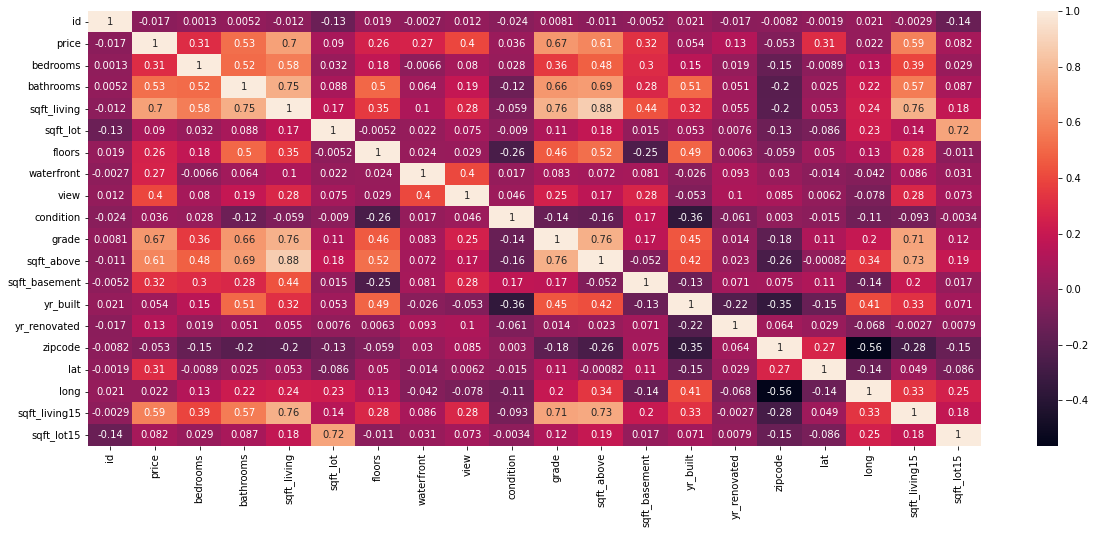

In [ ]:
#checking the corelation between the features inorder to check if the dimensions can be reduced or not.

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot = True , color = 'r')
plt.show()

from above heatmap  we can conclude that id, long, lat,zipcode, dont effect the price of the  house so we can drop them.

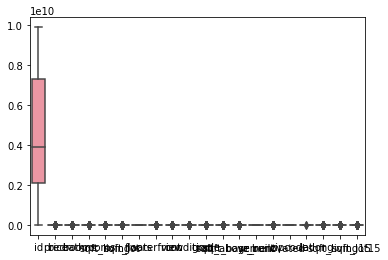

In [ ]:
#Checking outlier 
sns.boxplot(data = df)

<function matplotlib.pyplot.show(*args, **kw)>

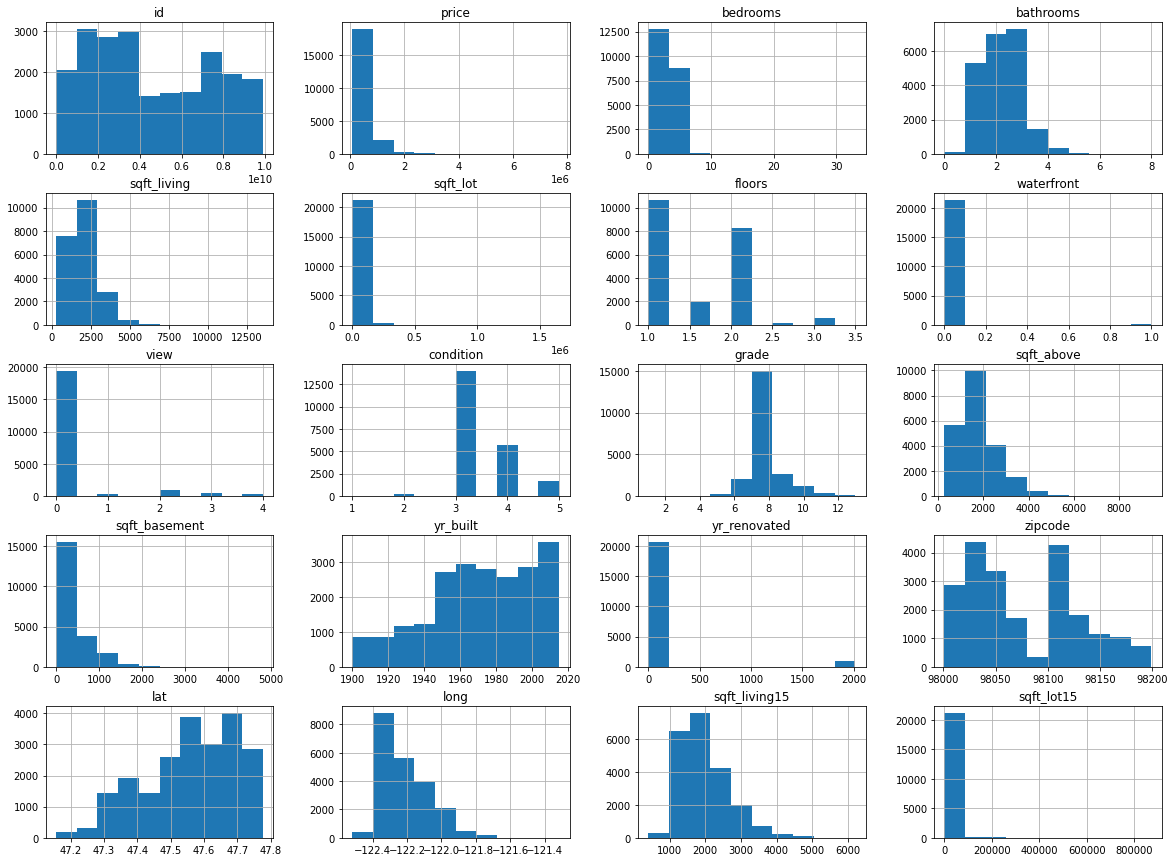

In [ ]:
df.hist(figsize = ( 20 , 15))
plt.show

data is not normally distributed we need to do normalization.

#Splitting the data

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
x = df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement','yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

In [ ]:
y = df['price']

In [ ]:
x 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,1530,1509
21609,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,1830,7200
21610,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,1020,2007
21611,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,1410,1287


In [ ]:
y

0       221900.00000
1       538000.00000
2       180000.00000
3       604000.00000
4       510000.00000
            ...     
21608   360000.00000
21609   400000.00000
21610   402101.00000
21611   400000.00000
21612   325000.00000
Name: price, Length: 21613, dtype: float64

# Training and testing the model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 40)

In [ ]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7495,5,3.00000,2670,11761,1.00000,0,0,3,7,1370,1300,1981,0,2580,10703
8804,3,3.00000,2880,3750,2.00000,0,0,3,9,2220,660,1909,1991,1910,4000
21471,4,2.50000,3130,5795,2.00000,0,0,3,9,3130,0,2008,0,2950,5259
9890,2,1.00000,980,5393,1.00000,0,0,3,6,980,0,1969,0,980,5200
16340,2,0.75000,660,5240,1.00000,0,0,4,4,660,0,1912,0,850,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,5,2.75000,2930,31411,1.00000,0,0,4,9,1520,1410,1975,0,3070,12378
16065,4,3.00000,2460,9606,1.00000,0,0,3,8,2460,0,2012,0,1730,7500
14501,3,1.00000,1150,6480,1.50000,0,0,4,5,1150,0,1946,0,1100,7300
14555,3,1.75000,2460,4240,1.00000,0,0,4,7,1230,1230,1925,0,1700,4240


In [ ]:
y_train

7495     515000.00000
8804    1000000.00000
21471    525000.00000
9890     128000.00000
16340    100000.00000
             ...     
11532    610000.00000
16065    280000.00000
14501    171500.00000
14555    930000.00000
11590    255000.00000
Name: price, Length: 17290, dtype: float64

#Data Standarization(Normalization)

In [ ]:
ss=StandardScaler()   #StandardScaler removes the mean and scales each feature to unit variance

In [ ]:
x_train_ss= ss.fit_transform(x_train)

In [ ]:
x_test_ss=ss.transform(x_test)

In [ ]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7495,5,3.00000,2670,11761,1.00000,0,0,3,7,1370,1300,1981,0,2580,10703
8804,3,3.00000,2880,3750,2.00000,0,0,3,9,2220,660,1909,1991,1910,4000
21471,4,2.50000,3130,5795,2.00000,0,0,3,9,3130,0,2008,0,2950,5259
9890,2,1.00000,980,5393,1.00000,0,0,3,6,980,0,1969,0,980,5200
16340,2,0.75000,660,5240,1.00000,0,0,4,4,660,0,1912,0,850,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,5,2.75000,2930,31411,1.00000,0,0,4,9,1520,1410,1975,0,3070,12378
16065,4,3.00000,2460,9606,1.00000,0,0,3,8,2460,0,2012,0,1730,7500
14501,3,1.00000,1150,6480,1.50000,0,0,4,5,1150,0,1946,0,1100,7300
14555,3,1.75000,2460,4240,1.00000,0,0,4,7,1230,1230,1925,0,1700,4240


In [ ]:
x_train_ss

array([[ 1.74017676,  1.15267592,  0.64399398, ..., -0.20874689,
         0.86650463, -0.07542383],
       [-0.39726196,  1.15267592,  0.87281643, ...,  4.77794971,
        -0.11166252, -0.31586069],
       [ 0.6714574 ,  0.5020355 ,  1.1452241 , ..., -0.20874689,
         1.40668648, -0.27070032],
       ...,
       [-0.39726196, -1.44988575, -1.01224466, ..., -0.20874689,
        -1.29422281, -0.19748957],
       [-0.39726196, -0.47392512,  0.41517154, ..., -0.20874689,
        -0.41825222, -0.30725189],
       [-0.39726196, -1.44988575, -0.9032816 , ..., -0.20874689,
        -1.00223261, -0.09726869]])

In [ ]:
x_test_ss

array([[ 0.6714574 ,  1.80331633,  1.90796558, ..., -0.20874689,
         0.29712375, -0.07276945],
       [ 0.6714574 ,  0.5020355 ,  0.73116444, ..., -0.20874689,
         1.20229335,  0.01030556],
       [-0.39726196,  0.5020355 , -0.18412534, ..., -0.20874689,
         0.50151688,  1.95356484],
       ...,
       [-1.46598132,  0.17671529, -0.47832563, ..., -0.20874689,
        -0.50584928, -0.37899196],
       [ 0.6714574 ,  1.15267592,  1.15612041, ..., -0.20874689,
         1.1292958 , -0.09999481],
       [-0.39726196, -1.44988575, -0.89238529, ..., -0.20874689,
        -0.33065517, -0.18651334]])

#Training the model

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train_ss, y_train)


LinearRegression()

In [ ]:
y_pred=model.predict(x_test_ss)
y_pred

array([988225.99362686, 746177.04477124, 343055.29125023, ...,
       525903.89455299, 813144.95910714, 320661.10008907])

In [ ]:
mean_absolute_error(y_test,y_pred)  #Mean absolute error gives the mean of absolute difference between model prediction and target value.

139588.81822822202

In [ ]:
r2_score(y_test,y_pred) # used to evaluate the performance of a linear regression model.

0.6507127017654237

#Prediction for the single house 

In [ ]:
new_house=[[3,1,1520,5000,1,0,0,3,8,1000,1,2020,0,2000,5000]]
new_house_ss=ss.transform(new_house)
new_house_ss
int(model.predict(new_house_ss))



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


200907